VA lung cancer data
  
Patients with advanced, inoperable lung cancer were treated with
chemotherapy.
N = 137
# Veteran's Administration Lung Cancer Trial
# Taken from Kalbfleisch and Prentice, pages 223-224   
# Variables In order
# Treatment 1=standard, 2=test
# Cell type 1=squamous, 2=small cell, 3=adeno, 4=large
# Number of days since the patient joined the study
# Status 1=dead, 0=alive
# Karnofsky score (measure of general performance, 100=best)
# Months from Diagnosis
# Age in years
# Prior therapy 0=no, 10=yes

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,mean_absolute_error
from sklearn import tree

In [3]:
data =pd.read_csv('/content/VA lung cancer data.csv')

In [4]:
data

,Treatment,Cell type,Number of days,Status,Karnofsky score,Months from Diagnosis,Age,Prior therapy
0,1,1,72,1,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10
...,...,...,...,...,...,...,...,...
132,2,4,133,1,75,1,65,0
133,2,4,111,1,60,5,64,0
134,2,4,231,1,70,18,67,10
135,2,4,378,1,80,4,65,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Treatment               137 non-null    int64
 1    Cell type              137 non-null    int64
 2    Number of days         137 non-null    int64
 3   Status                  137 non-null    int64
 4   Karnofsky score         137 non-null    int64
 5   Months from Diagnosis   137 non-null    int64
 6   Age                     137 non-null    int64
 7   Prior therapy           137 non-null    int64
dtypes: int64(8)
memory usage: 8.7 KB


In [6]:

data.describe()

,Treatment,Cell type,Number of days,Status,Karnofsky score,Months from Diagnosis,Age,Prior therapy
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,1.496350,2.335766,121.627737,0.934307,58.569343,8.773723,58.306569,2.919708
std,0.501821,1.066036,157.816722,0.248655,20.039592,10.612141,10.541628,4.563375
min,1.000000,1.000000,1.000000,0.000000,10.000000,1.000000,34.000000,0.000000
25%,1.000000,1.000000,25.000000,1.000000,40.000000,3.000000,51.000000,0.000000
50%,1.000000,2.000000,80.000000,1.000000,60.000000,5.000000,62.000000,0.000000
75%,2.000000,3.000000,144.000000,1.000000,75.000000,11.000000,66.000000,10.000000
max,2.000000,4.000000,999.000000,1.000000,99.000000,87.000000,81.000000,10.000000


In [7]:
data.isnull().sum()

Treatment                 0
 Cell type                0
 Number of days           0
Status                    0
Karnofsky score           0
Months from Diagnosis     0
Age                       0
Prior therapy             0
dtype: int64

it show no missing values in this data

In [8]:
#Data Normalization could also be a typical practice in machine learning which consists of transforming numeric columns to a standard scale.
#Calculate the minimum and maximum values of the data
min_value = data.min()
max_value = data.max()

# Apply the Min-Max normalization formula to the data
data1 = ((0.99 - 0.01) * (data - min_value) / (max_value - min_value)) + 0.01

# Print the normalized data
print(data1)

     Treatment   Cell type   Number of days  Status  Karnofsky score  \
0         0.01        0.01         0.079719    0.99         0.560562   
1         0.01        0.01         0.412605    0.99         0.670674   
2         0.01        0.01         0.232906    0.99         0.560562   
3         0.01        0.01         0.132745    0.99         0.560562   
4         0.01        0.01         0.124890    0.99         0.670674   
..         ...         ...              ...     ...              ...   
132       0.99        0.99         0.139619    0.99         0.725730   
133       0.99        0.99         0.118016    0.99         0.560562   
134       0.99        0.99         0.235852    0.99         0.670674   
135       0.99        0.99         0.380200    0.99         0.780787   
136       0.99        0.99         0.057134    0.99         0.230225   

     Months from Diagnosis        Age  Prior therapy  
0                  0.078372  0.739787           0.01  
1                  0.0555

In [9]:
min_value

Treatment                  1
 Cell type                 1
 Number of days            1
Status                     0
Karnofsky score           10
Months from Diagnosis      1
Age                       34
Prior therapy              0
dtype: int64

In [10]:
# Split the data into features (X) and target variable (y)
X = data.drop(['Status'],axis=1)
y = data['Status']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression model

In [12]:
model =LogisticRegression()

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Make predictions on the test set
y_pred_LR = model.predict(X_test)

In [15]:
y_pred_LR

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [16]:
LR_accuracy=accuracy_score(y_test,y_pred_LR)
LR_accuracy

0.9642857142857143

In [17]:
LR_CR=classification_report(y_test,y_pred_LR)
print(LR_CR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        27

    accuracy                           0.96        28
   macro avg       0.48      0.50      0.49        28
weighted avg       0.93      0.96      0.95        28



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Evaluate the model's performance
mse = mean_squared_error(y_test,y_pred_LR)
mae = mean_absolute_error(y_test,y_pred_LR)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.03571428571428571
Mean Absolute Error: 0.03571428571428571


Decision Trees model

In [19]:
#min_samples_split
model_DT=tree.DecisionTreeClassifier()

In [20]:
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
#prediction
DT_y_pred=model_DT.predict(X_test)

In [22]:
DT_y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [23]:
DT_accuracy=accuracy_score(y_test,DT_y_pred)
DT_accuracy

0.8214285714285714

In [24]:
DT_CR=classification_report(y_test,DT_y_pred)
print(DT_CR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      0.85      0.90        27

    accuracy                           0.82        28
   macro avg       0.48      0.43      0.45        28
weighted avg       0.92      0.82      0.87        28



In [25]:
# Evaluate the model's performance
mse = mean_squared_error(y_test,DT_y_pred)
mae = mean_absolute_error(y_test,DT_y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.17857142857142858
Mean Absolute Error: 0.17857142857142858


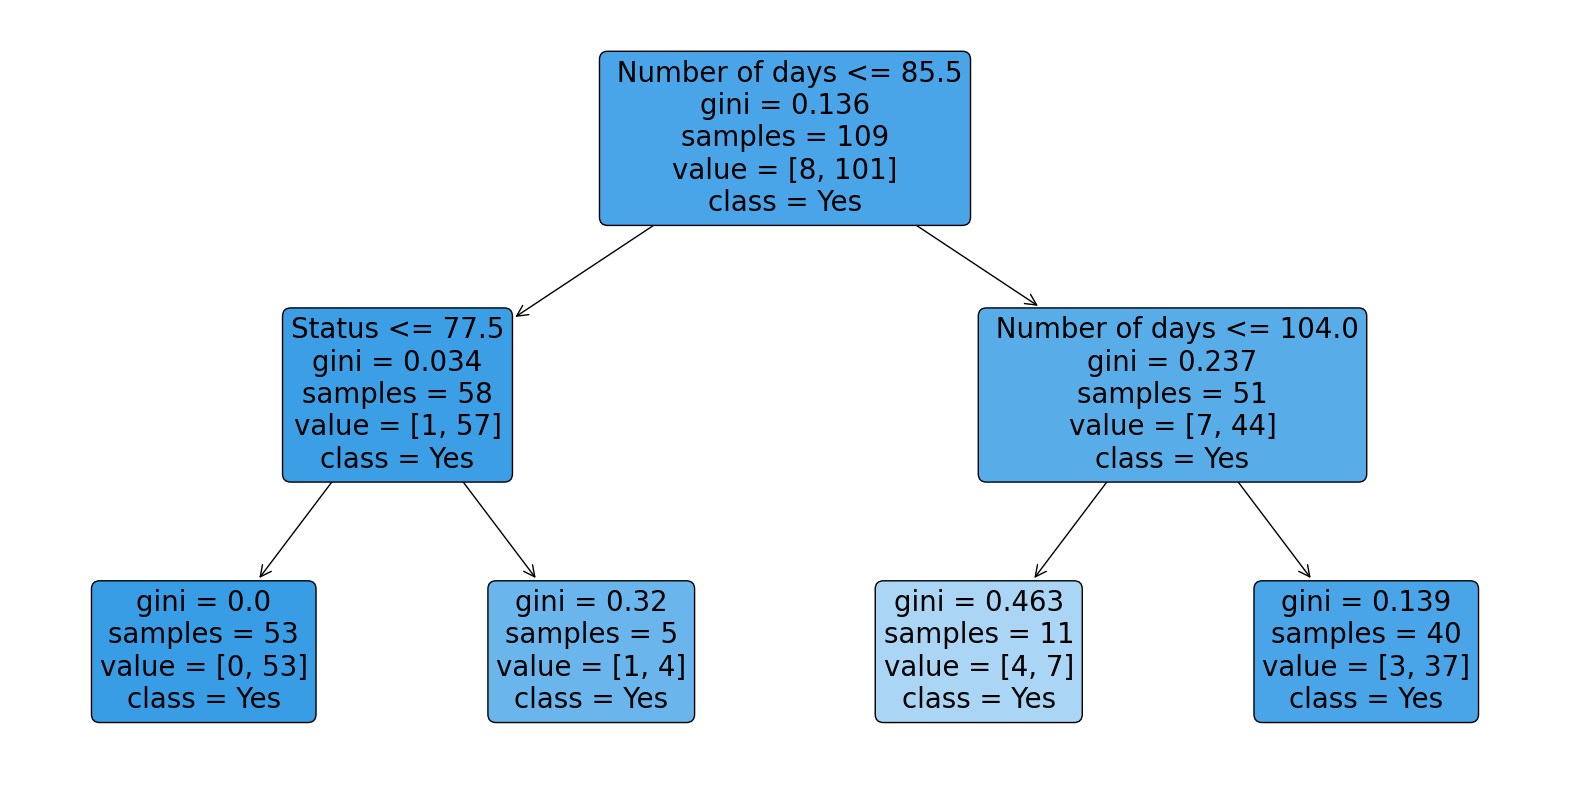

In [26]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline
clf = DecisionTreeClassifier(random_state = 42,max_depth=5,criterion='gini', min_samples_split=50)
clf.fit(X_train,y_train)
plt.figure(figsize=(20, 10))
plot_tree(clf,
         feature_names=list(data.columns),
         class_names=["Non", "Yes"],
         filled=True,
         rounded=True
         )
plt.show()

<Axes: xlabel='Status', ylabel='count'>

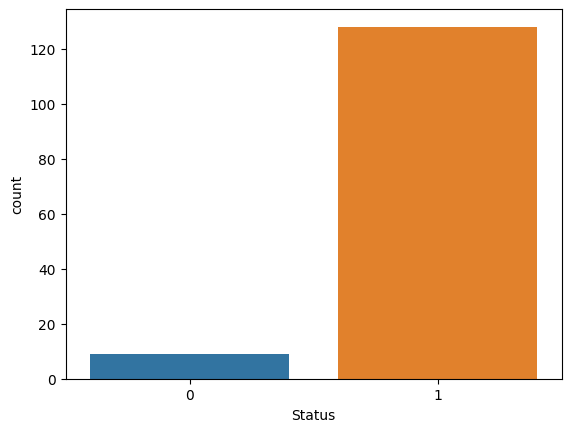

In [27]:
#Data visualizations
import seaborn as sns
sns.countplot(x='Status', data=data)

lung cancer  is the target variable being predicted, with values of 1 indicating the presence of people how dead because lung cancer and 0 showing the people how  alive who have lung cancer.